<a href="https://colab.research.google.com/github/aiAintEasy-HolyCalamity/RacingProblem/blob/main/RacingProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Racing Problem

A robot car wants to travel far, quickly.
Three states: Cool, Warm, Overheated
Two actions: Slow, Fast
Going Fast gives double reward but risks overheating.

**Transition Rules:**
From Cool:
*  Slow: Stay Cool (+1 point)
*  Fast: Move to Warm (+2 points)

From Warm:
*  Slow: 50% chance to Cool (+1), 50% stay Warm (+1)
*  Fast: 100% chance to Overheat (-10)

From Overheated:
*  Terminal State (Episode Ends)

*Reward Logic:*

*  Slow = +1, Fast = +2 (if possible)
*  Overheating = -10

This example demonstrates how RL uses Markov Decision Processes (MDP) to balance reward vs risk.


In [1]:
#Reinforcement Learning Code - Racing Problem (MWP)

import numpy as np
import random
states = ['Cool', 'Warm', 'Overheated']
actions = ['Slow', 'Fast']

# Reward matrix for [state][action]​
rewards = {
		'Cool': {'Slow': 1, 'Fast': 2},
		'Warm': {'Slow': 1, 'Fast': -10},
		'Overheated': {'Slow': 0, 'Fast': 0}
}

# Transition probabilities​
transitions = {
		'Cool': {'Slow': 'Cool', 'Fast': 'Warm'},
		'Warm': {'Slow': ['Cool', 'Warm'], 'Fast': 'Overheated'},
}

Q = np.zeros((len(states), len(actions)))
gamma = 0.9
alpha = 0.1
episodes = 1000

for episode in range(episodes):
		state = 'Cool'
		while state != 'Overheated':
				action = random.choice(actions)
				if state == 'Warm' and action == 'Slow':
						next_state = random.choices(['Cool', 'Warm'], [0.5, 0.5])[0]
				else:

						next_state = transitions[state][action]

				reward = rewards[state][action]
				s_idx = states.index(state)
				a_idx = actions.index(action)
				ns_idx = states.index(next_state)
				Q[s_idx][a_idx] = Q[s_idx][a_idx] + alpha * (
						reward + gamma * np.max(Q[ns_idx]) - Q[s_idx][a_idx]
				)

				state = next_state

print("Trained Q-Table:")
print(Q)

Trained Q-Table:
[[ 13.29013922  13.64196945]
 [ 12.93830208 -10.        ]
 [  0.           0.        ]]


Explanation:

* The car chooses "Fast" or "Slow" based on maximizing rewards.
* "Fast" earns double reward but risks overheating.
* Over multiple episodes, Q-learning helps the car learn when to go
slow to cool down and when to speed up for rewards.
* The agent balances speed vs overheating risk based on learned
Q-values.

## Visual Robot Car Animation
Blue (Cool), Red (Warm), Rewards Displayed

<ipython-input-2-1e71a0464123>:48: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  HTML(ani.to_jshtml())


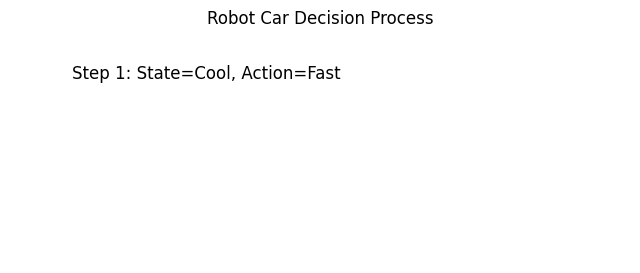

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

states = ['Cool', 'Warm', 'Overheated']
transitions = {
		'Cool': {'Slow': 'Cool', 'Fast': 'Warm'},
		'Warm': {'Slow': ['Cool', 'Warm'], 'Fast': 'Overheated'}
}

rewards = {
		'Cool': {'Slow': 1, 'Fast': 2},
		'Warm': {'Slow': 1, 'Fast': -10},
		'Overheated': {'Slow': 0, 'Fast': 0}
}

log = []
state = 'Cool'
total_reward = 0
step = 1

max_steps = 15 # LIMIT steps to avoid crash​
while state != 'Overheated' and step <= max_steps:
		action = 'Fast' if state == 'Cool' else 'Slow'
		log.append(f"Step {step}: State={state}, Action={action}")
		if state == 'Warm' and action == 'Slow':
				next_state = random.choices(['Cool', 'Warm'], [0.5, 0.5])[0]

		else:
				next_state = transitions[state][action]
		reward = rewards[state][action]
		total_reward += reward
		log.append(f" 	-> Moved to {next_state}, Reward: {reward}")
		state = next_state
		step += 1
log.append(f"Final State: {state}, Total Reward: {total_reward}")

# Animation function​
fig, ax = plt.subplots(figsize=(8, 3))
def animate(i):
		ax.clear()
		ax.set_title("Robot Car Decision Process")
		ax.text(0.1, 0.8, log[i], fontsize=12)
		ax.axis('off')
ani = animation.FuncAnimation(fig, animate, frames=len(log), interval=1500, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())